In [ ]:
import numpy as np

# Define the Perceptron class
class Perceptron:
    """
    A simple Perceptron classifier implementation from scratch.

    The Perceptron is a fundamental building block of neural networks and serves
    as a linear binary classifier. It learns a decision boundary to separate
    data points into two classes (e.g., 0 and 1).

    Attributes:
        weights (np.ndarray): A 1D NumPy array for the feature weights.
        bias (float): The bias term (also known as intercept or w_0).
        learning_rate (float): The step size for updating weights during training.
        n_iterations (int): The number of passes over the training data.
    """

    def __init__(self, learning_rate: float = 0.01, n_iterations: int = 100):
        """
        Initializes the Perceptron with a learning rate and number of iterations.

        Args:
            learning_rate (float): Controls the step size of weight updates.
                                   A smaller learning rate means slower but potentially
                                   more stable learning. Defaults to 0.01.
            n_iterations (int): The maximum number of epochs (passes over the training data)
                                for training. Defaults to 100.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None  # Weights will be initialized during training
        self.bias = None     # Bias will be initialized during training

    def _activation_function(self, z: float) -> int:
        """
        The step (or Heaviside) activation function.

        This function maps the net input to a binary output (0 or 1).
        If the net input 'z' is greater than or equal to 0, it outputs 1;
        otherwise, it outputs 0.

        Args:
            z (float): The net input (weighted sum of inputs + bias).

        Returns:
            int: The binary output (0 or 1).
        """
        return 1 if z >= 0 else 0

    def fit(self, X: np.ndarray, y: np.ndarray):
        """
        Trains the Perceptron model using the Perceptron learning rule.

        The Perceptron learning rule updates weights and bias incrementally
        for misclassified samples. This rule guarantees convergence if the
        data is linearly separable.

        Args:
            X (np.ndarray): The training features. A 2D NumPy array where
                            each row is a sample and each column is a feature.
            y (np.ndarray): The target labels. A 1D NumPy array of binary labels (0 or 1).

        Raises:
            ValueError: If input dimensions are inconsistent.
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias to zeros
        # Weights correspond to the number of features.
        # Bias is a single scalar.
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Iterate over the specified number of training epochs
        for _ in range(self.n_iterations):
            # Iterate over each sample in the training data
            for idx, x_i in enumerate(X):
                # Calculate the net input (z)
                # z = w_1*x_1 + w_2*x_2 + ... + w_d*x_d + bias
                linear_model_output = np.dot(x_i, self.weights) + self.bias

                # Apply the activation function to get the predicted label
                y_predicted = self._activation_function(linear_model_output)

                # Calculate the update based on the error
                # The error is the difference between the actual and predicted label.
                # Update = learning_rate * (actual_label - predicted_label)
                update = self.learning_rate * (y[idx] - y_predicted)

                # Update weights and bias
                # Weights are updated proportionally to the input features and the error.
                # bias is updated proportionally to the error.
                self.weights += update * x_i
                self.bias += update

        print(f"Perceptron training finished. Learned weights: {self.weights}, bias: {self.bias}")


    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Makes predictions for new input samples.

        For each sample, it calculates the net input and applies the activation function
        to classify it into one of the two binary classes.

        Args:
            X (np.ndarray): The input features for prediction. A 2D NumPy array.

        Returns:
            np.ndarray: A 1D NumPy array of predicted binary labels (0 or 1).
        """
        # Calculate the net input for all samples
        # This is a vectorized operation for efficiency.
        linear_model_output = np.dot(X, self.weights) + self.bias

        # Apply the activation function to each net input to get predictions
        # Using np.vectorize to apply the _activation_function to all elements.
        y_predictions = np.vectorize(self._activation_function)(linear_model_output)

        return y_predictions

Training Data (X_train):
[[2 3]
 [1 1]
 [3 3]
 [1 2]
 [4 5]
 [0 0]]

Training Labels (y_train):
[1 0 1 0 1 0]

--- Starting Perceptron Training ---
Perceptron training finished. Learned weights: [0.4 0.1], bias: -0.7
--- Perceptron Training Completed ---

Test Data (X_test):
[[2.5 3.5]
 [0.5 1.5]
 [5.  5. ]
 [1.2 0.8]]

Predictions on Test Data:
[1 0 1 0]


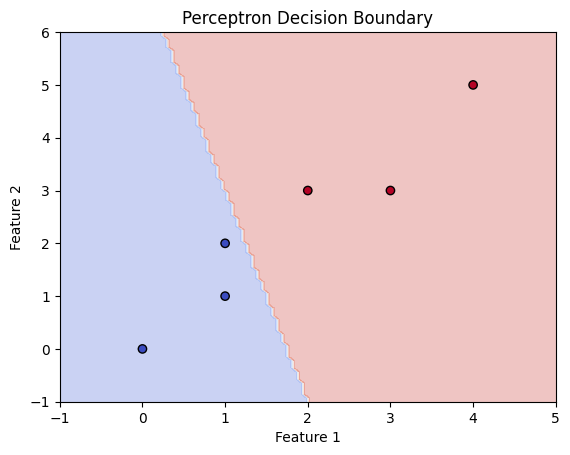

In [ ]:
# --- Usage Example ---
if __name__ == "__main__":
    # 1. Prepare some synthetic (dummy) data for binary classification
    # This data is linearly separable, which is a key assumption for the Perceptron to converge.
    X_train = np.array([
        [2, 3],  # Class 1
        [1, 1],  # Class 0
        [3, 3],  # Class 1
        [1, 2],  # Class 0
        [4, 5],  # Class 1
        [0, 0]   # Class 0
    ])
    y_train = np.array([1, 0, 1, 0, 1, 0])

    print("Training Data (X_train):")
    print(X_train)
    print("\nTraining Labels (y_train):")
    print(y_train)

    # 2. Create a Perceptron instance
    # We can experiment with different learning_rate and n_iterations values.
    # For linearly separable data, the Perceptron is guaranteed to converge in a finite number of steps.
    perceptron_model = Perceptron(learning_rate=0.1, n_iterations=1000)

    # 3. Train the Perceptron model
    print("\n--- Starting Perceptron Training ---")
    perceptron_model.fit(X_train, y_train)
    print("--- Perceptron Training Completed ---")

    # 4. Make predictions on new data (or even training data to see its performance)
    X_test = np.array([
        [2.5, 3.5], # Should be Class 1
        [0.5, 1.5], # Should be Class 0
        [5, 5],     # Should be Class 1
        [1.2, 0.8]  # Should be Class 0
    ])

    print("\nTest Data (X_test):")
    print(X_test)

    predictions = perceptron_model.predict(X_test)
    print("\nPredictions on Test Data:")
    print(predictions)

    # You can also visualize the decision boundary for 2D data (requires matplotlib)
    # This part is optional but highly recommended for a book.
    try:
        import matplotlib.pyplot as plt

        # Plotting the decision boundary
        # Define the decision boundary: w1*x1 + w2*x2 + b = 0  => x2 = (-w1/w2)*x1 - (b/w2)
        x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

        xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                             np.linspace(x2_min, x2_max, 100))

        Z = perceptron_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
        Z = Z.reshape(xx1.shape)

        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=plt.cm.coolwarm)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Perceptron Decision Boundary')
        plt.show()

    except ImportError:
        print("\nMatplotlib not installed. Skipping visualization example.")